In [ ]:
#1. Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Quick Question

## What is numpy and matplotlib?
## Google it and write the answer

## Your Answer
#numpy: 수학,과학 계산용 파이썬 라이브러리
#matplotlib: 데이터 시각화 파이썬 라이브러리

In [ ]:
# Let's make a linear function
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): # 'make_linear' 이름의 함수 정의 - we're going to use this function later on
    x = np.random.rand(size) # random x: 실행할 때마다 다른 plot이 만들어짐
    y = w * x + b # y=wx+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # random noise: 입실론 내용
    yy = y + noise # adding random noise to y

    plt.figure(figsize=(10, 7)) # plotting the figure - figure size
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') # plot x in x-axis, y in y-axis, and label -- line plot
    plt.scatter(x, yy, label='data') ## plot x in x-axis, yy (y+noise) in y-axis -- scatter plot
    plt.legend(fontsize=20) ## setting legend's fontsize
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy ## The function make_linear will return the value x and yy in the end

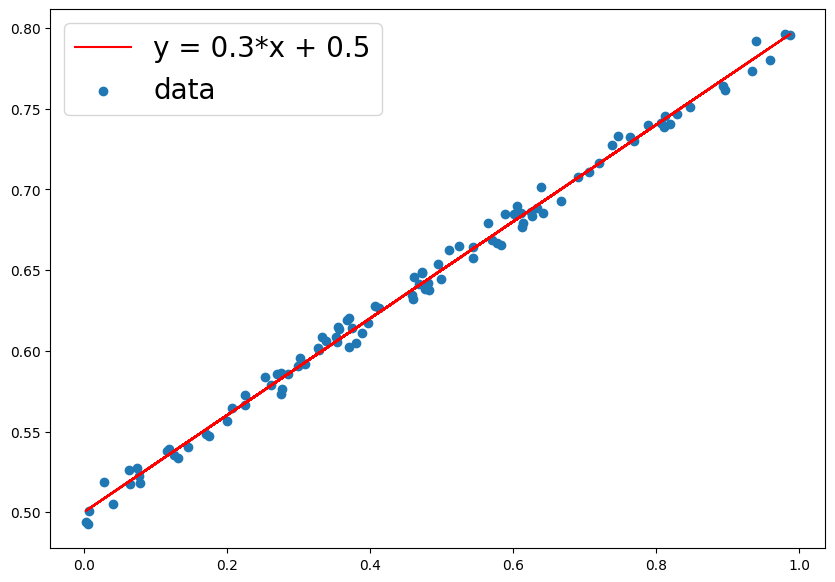

w: 0.3, b: 0.5


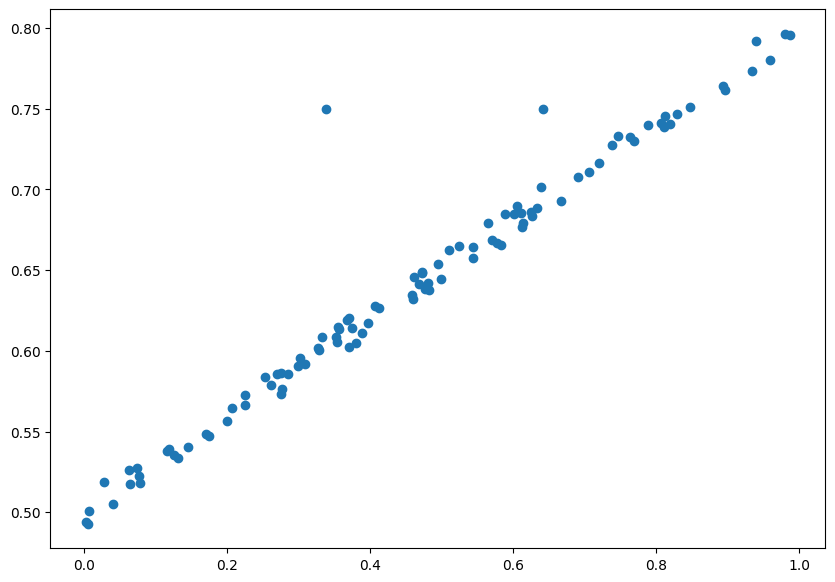

In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) ## Here we use the function make_linear -> first figure: line + scatter plot

## Intentionally making 1 outlier -> Q. 왜 2개가 아니라 1개의 outlier인걸까?
y[5] = 0.75 #index 5의 y값을 0.75로 고정
y[10] = 0.75 #index 10의 y값을 0.75로 고정

plt.figure(figsize=(10, 7))
plt.scatter(x, y) ## second figure: only scatter plot
plt.show()

In [ ]:
## randomly choose w and b: w,b 초기
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

## y_hat: prediction
y_hat = w * x + b

## Loss function
error = (y_hat - y) ** 2

## Quick Question
## (1) Write a name of the loss function above. HInt: _ _ _ Loss

## (2) Is it okay to use 'error = (y_hat-y)' or 'error = np.abs(y_hat-y)'?
## Write your own answer and justify your choice.

## Your Answer
## (1) Cross entropy loss

## (2)
#i) error = (y_hat-y) 정의 사용 불가: MSE를 계산 시, 편차의 합은 0이 되므로 계산의 의미가 없어진다. 따라서, 편차값에 절댓값을 이용(ii)하거나, 제곱값(현안)을 사용해야 한다.
#ii) error = np.abs(y_hat-y): 개념상 절댓값을 사용해도 상관없으나, 이후 gradient descent 과정에서 미분 시, 연산이 불가할 수 있으므로 편차를 제곱한 식을 cost function으로 사용한다.

In [ ]:
#hyperparameter 정의

# Epoch (# of iterations)
num_epoch = 5000

# Learning rate
learning_rate = 0.5

## Quick Question
## (1) What is epoch? Google it and write your own answer in detail.
## (2) What is learning rate? Google in and write your own answer.

## Your Answer
## (1) epoch: 전체 traning set을 완벽히 사용하는 횟수

## (2) learning rate: step size를 변화시킴으로써 학습속도와 정확도 조절

In [ ]:
### Question 1. Please write a line-by-line explanation of the code above.
errors = [] #list와 array의 차이점: list는 서로 다른 자료형의 항목 포함 가능 <-> array는 동일 유형 항목만 가능
# w, b: random initialization: -1, 1로 range 설정
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)


for epoch in range(num_epoch): #위에서 설정한 num_epoch=5000 -1까지 반복 수행 => 마지막 iteration 번호가 4999인 이유
    y_hat = x * w + b #output(예측값) 계산식

    error = ((y_hat - y)**2).mean() #예측값과 실제 y값 사이의 MSE
    if error < 0.0005: #MSE<0.0005 될 때까지 학습
        break

    #parameter 학습: w(기울기), b(y절편)
    w = w - learning_rate * ((y_hat - y) * x).mean() #learning rate는 gradient descent의 weight 느낌!
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error) #매 epoch마다 발생한 error를 list에 추가

    if epoch % 5 == 0: #epoch가 5의 배수일 때마다(=5로 나누었을 때, 나머지가 0일 때)마가 아래의 값들 출력
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
        #epoch 번호(+여백조정), 현재 w값(소숫점 아래 5자리까지), 현재 b값(소숫점 아래 5자리까지), error(소숫점 아래 5자리까지) 출력
print("----" * 15) #구분선
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))
##epoch 번호(+여백조정), 현재 w값(소숫점 아래 첫번째까지), 현재 b값(소숫점 아래 첫번까지), error(소숫점 아래 5자리까지) 출력

 0 w = 0.18728, b = -0.12602 error = 2.23950
 5 w = 0.33576, b = 0.33060 error = 0.08925
10 w = 0.27396, b = 0.36722 error = 0.08481
15 w = 0.22040, b = 0.39594 error = 0.08170
20 w = 0.17504, b = 0.42024 error = 0.07947
25 w = 0.13664, b = 0.44082 error = 0.07787
30 w = 0.10412, b = 0.45824 error = 0.07672
35 w = 0.07659, b = 0.47299 error = 0.07590
40 w = 0.05328, b = 0.48548 error = 0.07531
45 w = 0.03354, b = 0.49605 error = 0.07489
50 w = 0.01683, b = 0.50501 error = 0.07458
55 w = 0.00268, b = 0.51259 error = 0.07437
60 w = -0.00930, b = 0.51901 error = 0.07421
65 w = -0.01945, b = 0.52444 error = 0.07410
70 w = -0.02804, b = 0.52905 error = 0.07402
75 w = -0.03531, b = 0.53294 error = 0.07396
80 w = -0.04147, b = 0.53624 error = 0.07392
85 w = -0.04668, b = 0.53904 error = 0.07389
90 w = -0.05110, b = 0.54140 error = 0.07387
95 w = -0.05484, b = 0.54340 error = 0.07385
100 w = -0.05800, b = 0.54510 error = 0.07384
105 w = -0.06068, b = 0.54654 error = 0.07384
110 w = -0.06295, b

In [ ]:
###2. Let's practice numpy
import numpy as np ## np: abbreviation of numpy (convention)

In [ ]:
arr = np.array([1,2,3]) # numpy array
print(arr)

[1 2 3]


In [ ]:
arr2 = np.array([[1,2,3], [4,5,6]]) # numpy array
print(arr2)

[[1 2 3]
 [4 5 6]]


In [ ]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
#Quick Question (Optional)
#https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html
#Read and summarize the document above.

In [ ]:
## Let's check their data type
## numpy.ndarray (n*d array)
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
## .shape returns the shape of the numpy array
print(arr.shape) # (3, ) -> because it's 1d array (vector)
print(arr2.shape) # matrix 2x3
print(arr3.shape) # matrix 3x3

(3,)
(2, 3)
(3, 3)


In [ ]:
## How to make numpy array more conveniently?
print(np.ones((2,3))) ## 모든 element가 1인 기본 행렬
print(2*np.ones((2,3))) ## 모든 element가 2가 되게 하기: 위 행렬에 2배 스칼라배

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [ ]:
print(np.zeros((2,3))) ## 모든 element가 0인 행렬(영행렬)
## Of course...
print(0*np.ones((2,3))) ## ZEROS!!

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
## Reshaping numpy array
arr12 = np.ones((3,4)) #3x4 크기의 모든 element가 1인 행렬
arr12.reshape(1, 12) #3x4 matrix -> 1x12 matrix (element는 유지, 행렬 크기만 변화)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
## But what if we do not know, the exact size of numpy array?
## Use -1

arr12.reshape(-1, 12) ## same result: 전체 element=12/12개의 columns => 자동으로 1x12 행렬 구현

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
## It's quite obvious but...
arr12.reshape(-1, 5) ## this does not work: 전체 element 수=12는 5개의 column으로 나눠지지 않기 때문에

ValueError: cannot reshape array of size 12 into shape (5)

In [ ]:
## Sorting the values: 오름차순으로 array 내 elements 재정렬
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed))

[1 2 3 5]


In [ ]:
## Indexing
arr4 = np.array([5,2,3,4,6])
print(arr4[1]) ## index starts with 0:  index 1에 오는 element 출력(=실제로는 두 번째 자리)

2


In [ ]:
## Slicing
arr4[1:3] ## Including 1st entry, excluding 3rd entry

array([2, 3])

In [ ]:
## Quick Question
## Write a code that slices arr4 from 1st entry to 4th entry. HInt: including 1st entry, excluding 5th entry

## Your Answer
arr4[1:5]

array([2, 3, 4, 6])

In [ ]:
###3. Let's practice matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# this command let us view the figure in the jupyter notebook directly

[1, 2, 3]


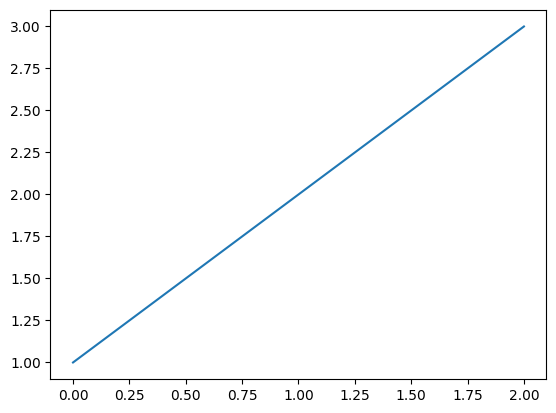

In [ ]:
#자동으로 x값 생성: [0, 1, 2](자동생성) -> x = [1, 2, 3]
x = [1, 2, 3]
print(x) # list with 1, 2, and 3
plt.plot(x) # matplotlib regard this as y-axis: 1, 2, 3 (the value given) -> corresponding x-axis: 0, 1, 2 (starting from 0, having 3 elements)

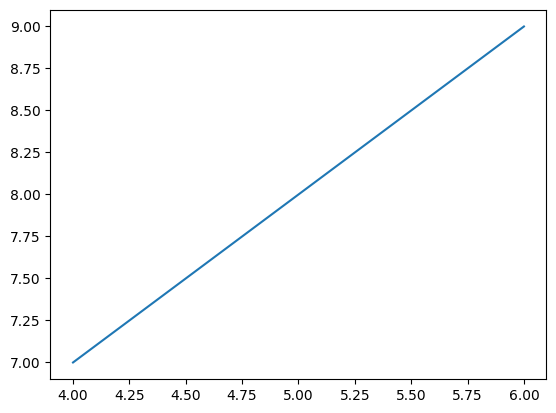

In [ ]:
## But what if we specify the elements of x-axis?: 각각 x와 y값에 대응하여 그래프 출력
x = [4, 5, 6]
y = [7, 8, 9]
plt.plot(x, y)

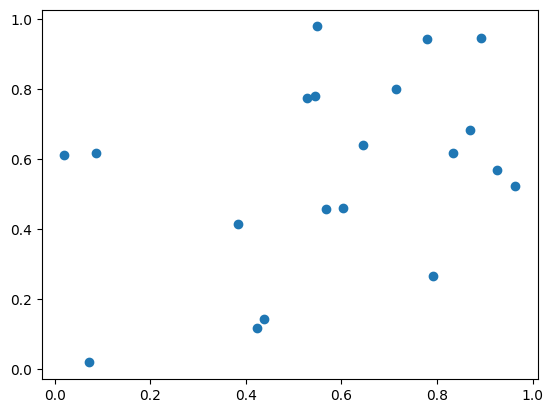

In [ ]:
# We can also draw a scatter plot
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0) #0의 의미: 뒤에 나오는 모든 np.random에 대해 동일한 random 값 생성

n = 20
x = np.random.rand(n) #매번 동일한 n개의 random값 생성
y = np.random.rand(n) #매번 동일한 n개의 random값 생성

plt.scatter(x, y)
plt.show()

<ipython-input-29-ec6e2a386ea9>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=1, cmap='Spectral') #alpha: 점의 투명도 설정(0:투명 ~1:뚜렷)cmap?


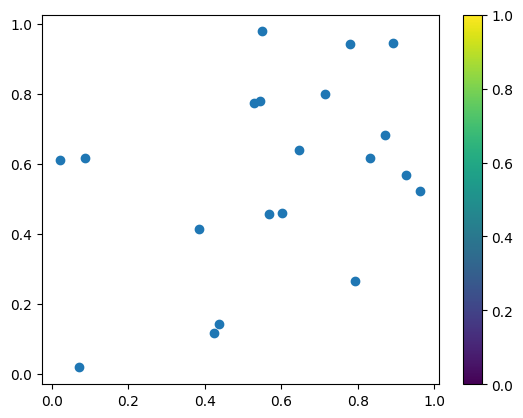

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.5, cmap='Spectral')
#alpha: 점의 투명도 설정(0:투명 ~1:뚜렷)
#cmap: 라이브러리에서 이미 정의된 'Spectral' 색상맵을 이용하여 점들의 색상 지정
plt.colorbar() #우편에 나타나는 color map 출력
plt.show()

<ipython-input-30-c5a0895b229b>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.1, cmap='Spectral')


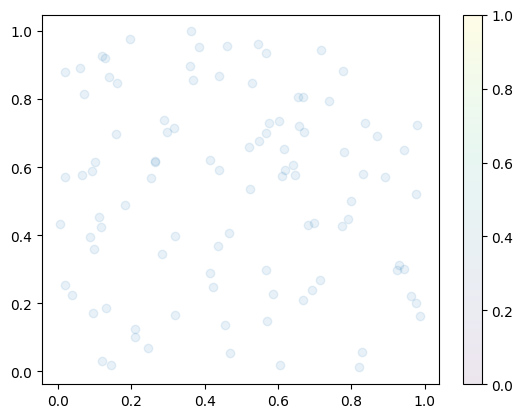

In [ ]:
#Question 3. Matplotlib
#(1) What is alpha and cmap above? Google it and write the answer.
#alpha: 점의 투명도 설정(0:투명 ~1:뚜렷)
#cmap: 라이브러리에서 이미 정의된 'Spectral' 색상맵을 이용하여 점들의 색상 지정

#(2) Write and execute a code that has alpha=0.1. Can you see the difference?
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 100
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.1, cmap='Spectral')
#alpha: 점의 투명도 설정(0:투명 ~1:뚜렷)
#cmap: 라이브러리에서 이미 정의된 'Spectral' 색상맵을 이용하여 점들의 색상 지정
plt.colorbar() #우편에 나타나는 color map 출력: alpha(투명도)에도 영향을 받음
plt.show()


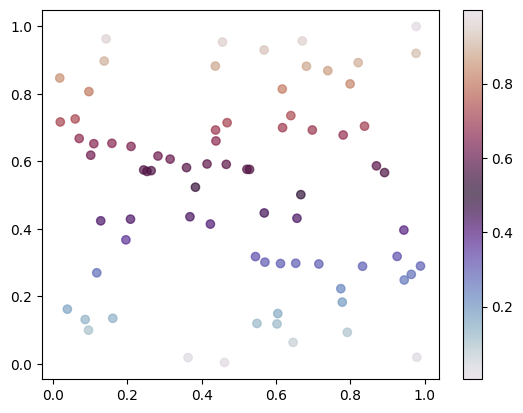

In [ ]:
#(3) Check the type of cmap and run the code that changed the type of cmap.
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 77
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.7, c=y, cmap='twilight')  #c=y: y값에 따라 색상 변화
#cmap='twilight': cyclic map(시작과 끝이 동일한 색의 map) 중에 하나로 부드럽게 이어지는 색상이 특징
plt.colorbar() #우편에 나타나는 color map 출력: alpha(투명도)에도 영향을 받음
plt.show()